In [1]:
from dataset_utils.preprocessing import letterbox_image_padded
from dataset_utils.eval import evaluate_dataset, evaluate_image, flag_induced_tp, evaluate_dataset_with_torch
from misc_utils.visualization import visualize_detections, get_gt_bboxes, graph_aps
from models.frcnn import FRCNN
from PIL import Image
from tog.attacks import *
from tqdm import tqdm
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

weights = 'model_files/FRCNN.pth'  # TODO: Change this path to the victim model's weights

detector = FRCNN().cuda(device=0).load(weights)

eps = 8 / 255.       # Hyperparameter: epsilon in L-inf norm
eps_iter = 2 / 255.  # Hyperparameter: attack learning rate
n_iter = 10          # Hyperparameter: number of attack iterations
path = "dataset/VOCdevkit/VOC2007/JPEGImages/"

# scores = evaluate_dataset(detector, path, attack=None)
# print("(benign) mAP is:", scores["map"])

# scores = evaluate_dataset(detector, path, attack=tog_attention, attack_params={"n_iter": n_iter, "eps": eps, "eps_iter":eps_iter})
# print("(attention) mAP is:", scores["map"])

# scores = evaluate_dataset(detector, path, attack=tog_untargeted, attack_params={"n_iter": n_iter, "eps": eps, "eps_iter":eps_iter})
# print("(untargeted) mAP is:", scores["map"])

/storage/ice1/5/9/zyahn3/TOG_plus/frcnn_utils/utils/nms/non_maximum_suppression.py:9: UserWarning: 
    the python code for non_maximum_suppression is about 2x slow
    It is strongly recommended to build cython code: 
    `cd model/utils/nms/; python3 build.py build_ext --inplace
  warnings.warn('''
/storage/ice1/5/9/zyahn3/TOG_plus/models/frcnn.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

<Figure size 640x480 with 0 Axes>

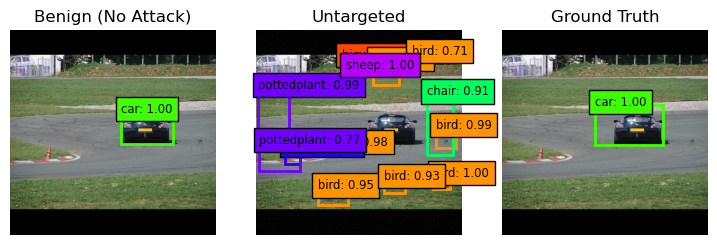

Evaluating image 000580.jpg
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],


In [3]:
fpath = 'dataset/VOCdevkit/VOC2007/JPEGImages/'
annot_path = 'dataset/VOCdevkit/VOC2007/Annotations/'
im = "000580.jpg"

input_img = Image.open(fpath + im)
x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
detections_query = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
x_adv = tog_untargeted(detector, x_query)
detections_adv = detector.detect(x_adv, conf_threshold=detector.confidence_thresh_default)
visualize_detections({'Benign (No Attack)': (x_query, detections_query, detector.model_img_size, detector.classes),
                     'Untargeted': (x_adv, detections_adv, detector.model_img_size, detector.classes),
                     'Ground Truth': (x_query, get_gt_bboxes(annot_path, im, x_meta), detector.model_img_size, detector.classes)}
                    )
evaluate_image(detector, fpath, annot_path, im, attack=None)


In [65]:
# Makes a figure that shows the perturbation, the gradient on the perturbation, 
# the sign of the gradient, and the distribution of pixel values
def visualize_perts(path):
    n_iter=10
    eps=8/255.
    eps_iter=4/255.
    
    input_img = Image.open(path)
    x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
    detections_query = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
    
    x_adv_vanish = tog_vanishing(detector, x_query, n_iter=n_iter, eps=eps, eps_iter=eps_iter)
    detections_adv_vanish = detector.detect(x_adv_vanish, conf_threshold=detector.confidence_thresh_default)
    pert_vanish = x_query - x_adv_vanish
    
    x_adv_fab = tog_fabrication(detector, x_query, eps=eps, eps_iter=eps_iter)
    detections_adv_fab = detector.detect(x_adv_fab, conf_threshold=detector.confidence_thresh_default)
    pert_fab = x_query - x_adv_fab
    
    x_adv_untarget = tog_untargeted(detector, x_query, eps=eps, eps_iter=eps_iter)
    detections_adv_untarget = detector.detect(x_adv_untarget, conf_threshold=detector.confidence_thresh_default)
    pert_untarget = x_query - x_adv_untarget
    
    visualize_detections({'Benign (No Attack)': (x_query, detections_query, detector.model_img_size, detector.classes),
                         'Vanishing': (x_adv_vanish, detections_adv_vanish, detector.model_img_size, detector.classes),
                         'Fabrication': (x_adv_fab, detections_adv_fab, detector.model_img_size, detector.classes),
                         'Untargeted': (x_adv_untarget, detections_adv_untarget, detector.model_img_size, detector.classes)})
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
    for a in ax.flat:
        a.set_axis_off()
    ax[0].matshow(pert_vanish.squeeze()[:, :, 0])
    ax[0].set_title("Vanishing")
    ax[1].matshow(pert_fab.squeeze()[:, :, 0])
    ax[1].set_title("Fabrication")
    ax[2].matshow(pert_untarget.squeeze()[:, :, 0])
    ax[2].set_title("Untargeted")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
#     for a in ax.flat:
#         a.set_axis_off()
    ax[0].hist(pert_vanish.flatten(), bins=50)
    ax[0].set_title("Vanishing")
    ax[1].hist(pert_fab.flatten(), bins=50)
    ax[1].set_title("Fabrication")
    ax[2].hist(pert_untarget.flatten(), bins=50)
    ax[2].set_title("Untargeted")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
    for a in ax.flat:
        a.set_axis_off()
    ax[0].matshow(pert_vanish.squeeze()[:, :, 0] - pert_fab.squeeze()[:, :, 0])
    ax[0].set_title("Vanishing - Fabrication")
    ax[1].matshow(pert_fab.squeeze()[:, :, 0] - pert_untarget.squeeze()[:, :, 0])
    ax[1].set_title("Fabrication - Untargeted")
    ax[2].matshow(pert_untarget.squeeze()[:, :, 0] - pert_vanish.squeeze()[:, :, 0])
    ax[2].set_title("Untargeted - Vanishing")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
#     for a in ax.flat:
#         a.set_axis_off()
    ax[0].hist((pert_vanish - pert_fab).flatten(), bins=50)
    ax[0].set_title("Vanishing")
    ax[1].hist((pert_fab - pert_untarget).flatten(), bins=50)
    ax[1].set_title("Fabrication")
    ax[2].hist((pert_untarget - pert_vanish).flatten(), bins=50)
    ax[2].set_title("Untargeted")
    plt.show()

# Calls visualize_pert on each iteration of the attack to view how it progresses    
def visualize_pert_stages(path):
    n_iter=10
    eps=8/255.
    eps_iter=1/255.
    
    img_path = 'dataset/VOCdevkit/VOC2007/JPEGImages/' + str(path)+'.jpg'
    annot_path = 'dataset/VOCdevkit/VOC2007/Annotations/'+str(path)+'.xml'

    input_img = Image.open(img_path)
    x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
    detections_query = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
    
    x_adv_untarget, etas, grads = tog_untargeted_viz(detector, x_query, n_iter=n_iter, eps=eps, eps_iter=eps_iter)
    detections_adv_untarget = detector.detect(x_adv_untarget, conf_threshold=detector.confidence_thresh_default)
    
    visualize_detections({'Benign (No Attack)': (x_query, detections_query, detector.model_img_size, detector.classes),
                        'Ground Truth': (x_query, get_gt_bboxes(annot_path, x_meta), detector.model_img_size, detector.classes),
                          'Untargeted': (x_adv_untarget, detections_adv_untarget, detector.model_img_size, detector.classes)})
    
    # normalize grads to make them easier to see
    grads_norm = (grads - np.min(grads)) / (np.max(grads) - np.min(grads))
    etas_norm = (etas - np.min(etas)) / (np.max(etas) - np.min(etas))
    
    fig, ax = plt.subplots(nrows=n_iter, ncols=4, figsize=(12, n_iter*3+8))
    
    for i in range(n_iter):
#         if i == n_iter - 1:
#             ax[i][0].matshow(etas[i].squeeze()[:, :, 0])
#             ax[i][1].matshow(np.zeros(etas_norm[i].squeeze()[:, :, 0].shape))
#             ax[i][2].matshow(np.zeros(etas_norm[i].squeeze()[:, :, 0].shape))
#             ax[i][3].hist(grads[i].flatten(), bins=100)
#         else:
        #ax[i].matshow(etas[i].squeeze()[:, :, 0])
        ax[i][0].matshow(etas_norm[i].squeeze()[:, :, 0])
        ax[i][1].matshow(grads_norm[i].squeeze()[:, :, 0])
        ax[i][2].matshow(np.sign(grads[i].squeeze()[:, :, 0]))
        ax[i][3].hist(grads[i].flatten(), bins=100)
#             ax[i].set_title(str(i))
#             ax[i,:].set_axis_off()
        ax[i][0].set_title("Iter " + str(i+1) + ": Perturb.")
        ax[i][1].set_title("Norm. Grad")
        ax[i][2].set_title("Sign Grad")
        ax[i][3].set_title("Dist.of Grad")

            
        
    plt.show()
    
#     fig, ax = plt.subplots(nrows=n_iter, figsize=(5, 30))
#     for i in range(n_iter):
#         ax[i].matshow(etas[i].squeeze()[:, :, 0])
#         #ax[i].hist(etas[i].flatten(), bins=500)
#         ax[i].set_title(str(i))
#         ax[i].set_axis_off()
#     plt.show()
    
#     fig, ax = plt.subplots(nrows=n_iter-1, figsize=(5, 30))
#     for i in range(n_iter-1):
#         #ax[i].matshow(etas[i].squeeze()[:, :, 0])
#         ax[i].matshow(grads[i].squeeze()[:, :, 0])
#         ax[i].set_title(str(i))
#         ax[i].set_axis_off()
#     plt.show()
# pert = x_adv - x_query
# plt.matshow(pert.squeeze()[:, :, 2])
# plt.show()
# plt.hist(pert.flatten())
# plt.show()

<Figure size 640x480 with 0 Axes>

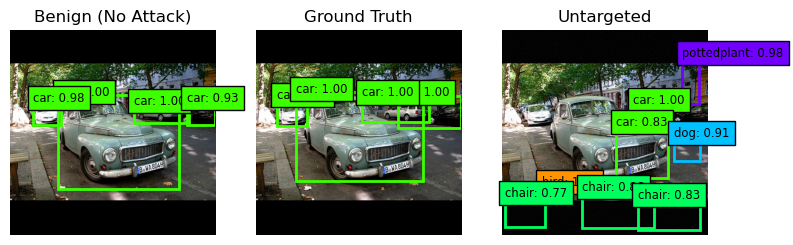

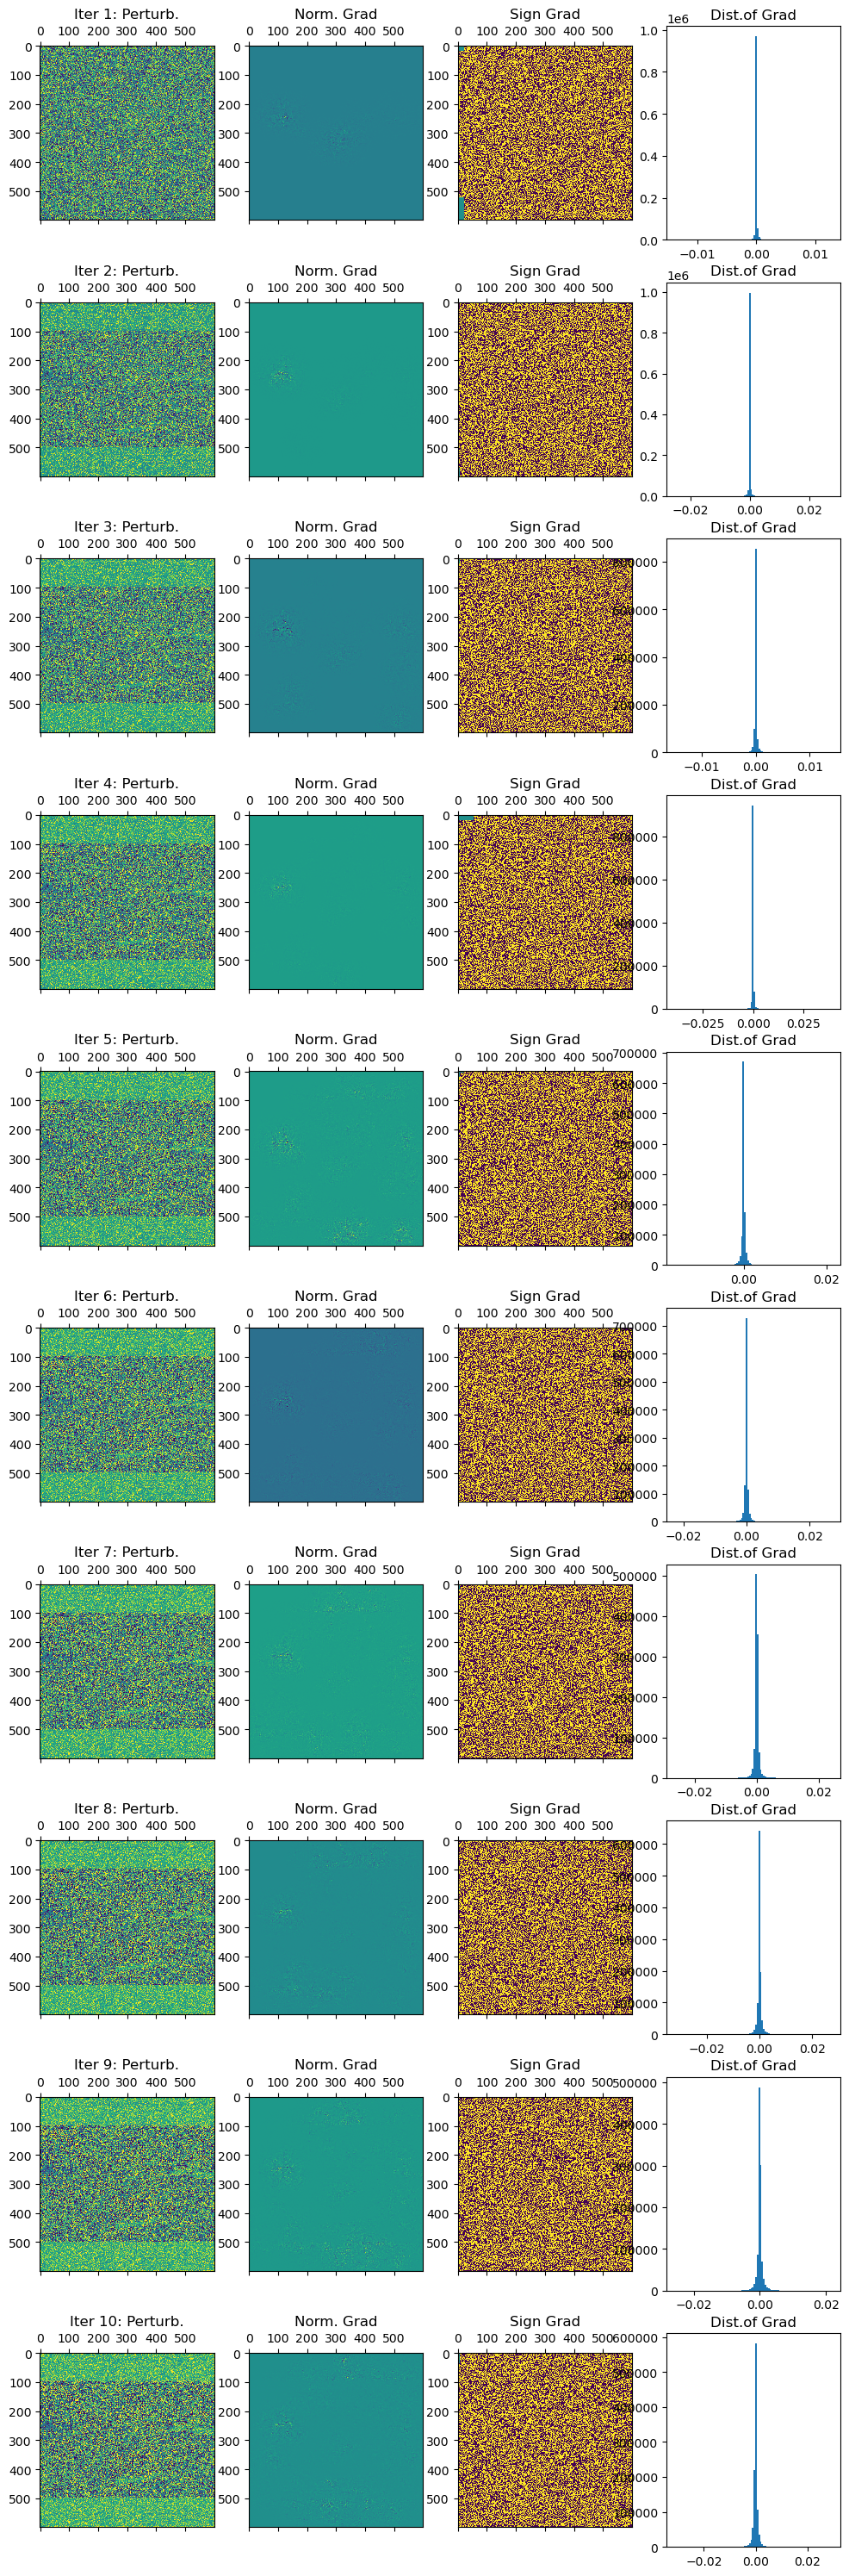

In [73]:
visualize_pert_stages("000152")


<Figure size 640x480 with 0 Axes>

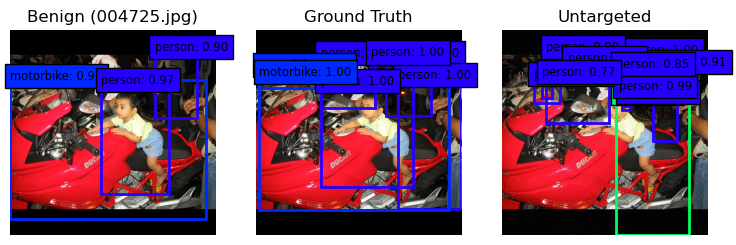

<Figure size 640x480 with 0 Axes>

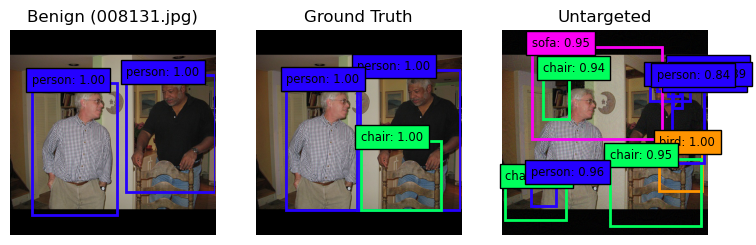

<Figure size 640x480 with 0 Axes>

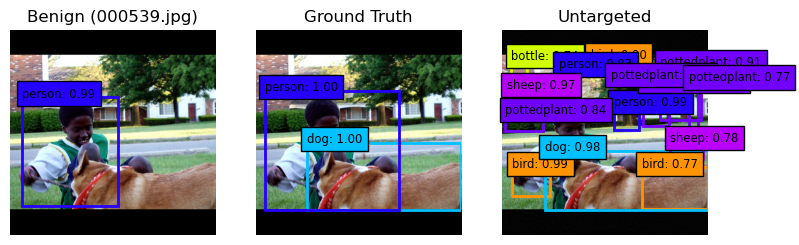

<Figure size 640x480 with 0 Axes>

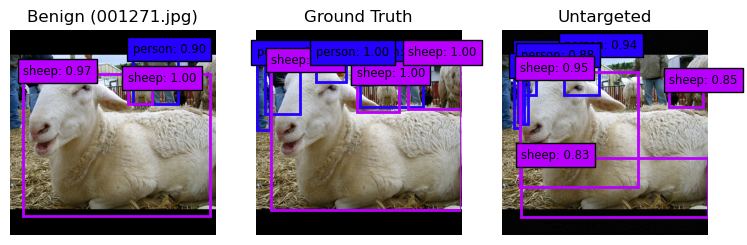

<Figure size 640x480 with 0 Axes>

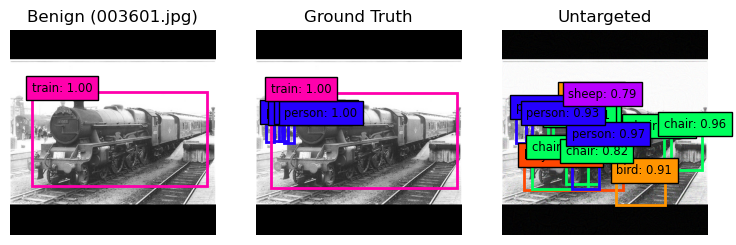

<Figure size 640x480 with 0 Axes>

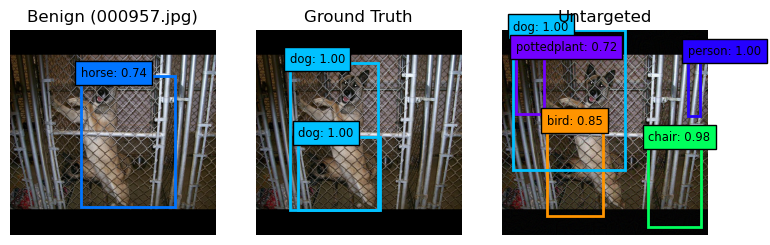

<Figure size 640x480 with 0 Axes>

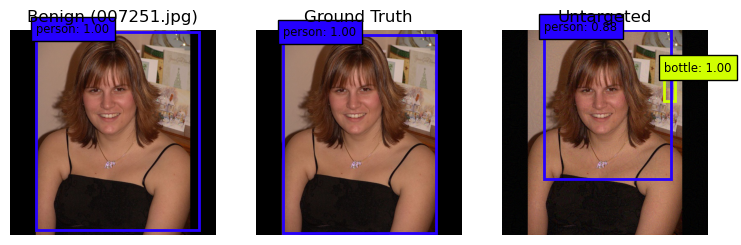

<Figure size 640x480 with 0 Axes>

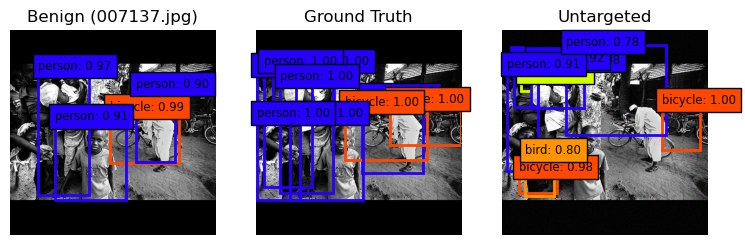

<Figure size 640x480 with 0 Axes>

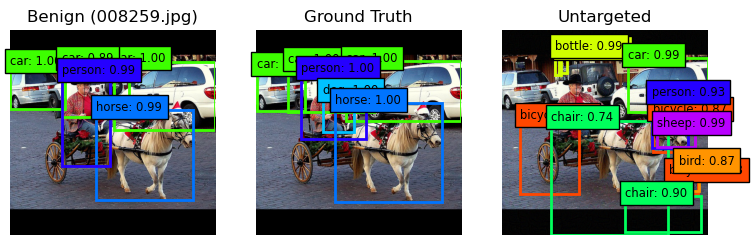

<Figure size 640x480 with 0 Axes>

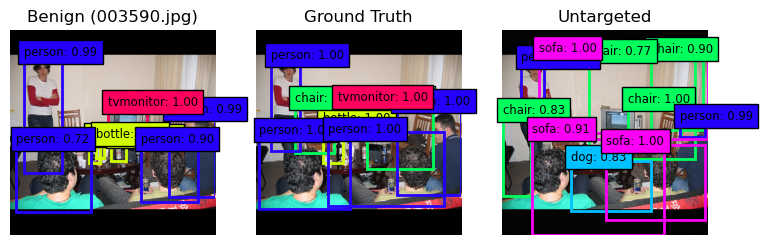

In [3]:
def visualize_fail_image(num):
    fpath = 'dataset/VOCdevkit/VOC2007/JPEGImages/'    # TODO: Change this path to the image to be attacked
    annot_path = 'dataset/VOCdevkit/VOC2007/Annotations/'

    input_img = Image.open(fpath + num)
    x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
    detections_query = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
    x_adv = tog_untargeted(detector, x_query)
    detections_adv = detector.detect(x_adv, conf_threshold=detector.confidence_thresh_default)
    visualize_detections({'Benign ('+str(num)+')': (x_query, detections_query, detector.model_img_size, detector.classes),
                          'Ground Truth': (x_query, get_gt_bboxes(annot_path, num, x_meta), detector.model_img_size, detector.classes),
                         'Untargeted': (x_adv, detections_adv, detector.model_img_size, detector.classes)})

f = open('dataset/AttackFails/attack_fails.txt')
for line in f.readlines()[10:20]:
    visualize_fail_image(line.strip("\n") + ".jpg")
    


In [2]:
#im_path = 'dataset/AttackFails/FailImages/'
im_path = 'dataset/VOCdevkit/VOC2007/JPEGImages/'
annot_path = 'dataset/VOCdevkit/VOC2007/Annotations/'
# --- FULL TEST SET ---
#mAP on benign: 0.6562
# aps: [0.7044335  0.69047619 0.63014493 0.56618357 0.49875    0.77065868
#  0.66304569 0.76463023 0.56941748 0.62568306 0.6761194  0.726
#  0.74104478 0.75495868 0.61304229 0.49082278 0.56467391 0.70657895
#  0.71692913 0.64954955]

#mAP on untarget is:
# [0.33333333, 0.06113537, 0.01683938, 0.05882353, 0.06603774, 0.02857143,
#  0.03419689, 0.14285714, 0.04780876, 0.,         0.,         0.12688822,
#  0.57142857, 0.03846154, 0.01785969, 0.03166227, 0.04651163, 0.07692308,
#  0.,         0.07792208]


# --- FAIL SUBSET ---
#TOG-class got 0.03814 on first 500 images

#mAP on benign for just this dataset is 0.6559
#APs:
# [0.75       0.732      0.53461538 0.55       0.46962025 0.9
#  0.7203125  0.85384615 0.55652174 0.65       0.59130435 0.75660377
#  0.70714286 0.61111111 0.60458716 0.42173913 0.58333333 0.66785714
#  0.95       0.50666667]

#mAP on untargeted for just this dataset is 0.2401
#APs:
# aps: [0.         0.33125    0.11754386 0.         0.21958763 0.6
#  0.2254717  0.4        0.19446494 0.         0.5        0.38550725
#  0.6        0.         0.14875491 0.19245283 0.2        0.34333333
#  0.         0.34444444]
# {'map': 0.24014054502154925}

#mAP on benign for entire dataset is 

scores = evaluate_dataset(detector, im_path, annot_path, num_examples=500, attack=None)
print(scores)
#flag_induced_tp(detector, im_path, annot_path, num_examples=20, attack=tog_untargeted)

100%|██████████| 500/500 [01:38<00:00,  5.10it/s]

{'aps': array([0.66433566, 0.55892256, 0.55244755, 0.54545455, 0.38383838,
       0.74545455, 0.57575758, 0.63203463, 0.47593583, 0.37784091,
       0.58585859, 0.62545455, 0.62770563, 0.63636364, 0.54965415,
       0.43272727, 0.32844575, 0.44415584, 0.75174825, 0.63636364]), 'map': 0.5565249747294494}


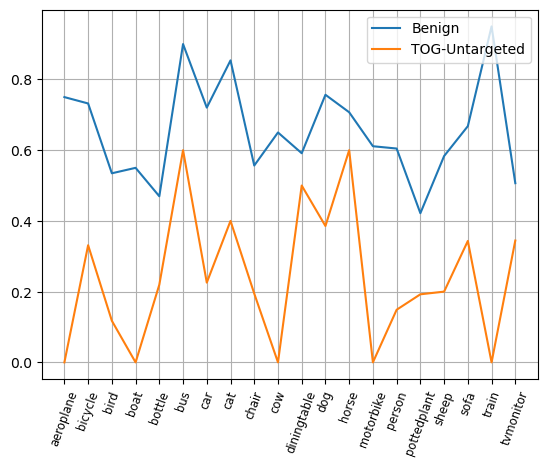

In [6]:
#Full Thing


# graph_aps({
#     "Benign": [0.7044335,  0.69047619, 0.63014493, 0.56618357, 0.49875,    0.77065868,
#                0.66304569, 0.76463023, 0.56941748, 0.62568306, 0.6761194,  0.726,
#                0.74104478, 0.75495868, 0.61304229, 0.49082278, 0.56467391, 0.70657895,
#                0.71692913, 0.64954955]
# # (untargeted class) mAP is: 0.6561571398315751,
#     "TOG-Untargeted": [0.33333333, 0.06113537, 0.01683938, 0.05882353, 0.06603774, 0.02857143,
#                       0.03419689, 0.14285714, 0.04780876, 0.,         0.,         0.12688822,
#                       0.57142857, 0.03846154, 0.01785969, 0.03166227, 0.04651163, 0.07692308,
#                       0.,         0.07792208]
# })
# Subset
graph_aps({
        "Benign":[0.75,       0.732,      0.53461538, 0.55,       0.46962025, 0.9,
                 0.7203125,  0.85384615, 0.55652174, 0.65,       0.59130435, 0.75660377,
                 0.70714286, 0.61111111, 0.60458716, 0.42173913, 0.58333333, 0.66785714,
                 0.95,       0.50666667,],
        "TOG-Untargeted": [0.,         0.33125,    0.11754386, 0.,         0.21958763, 0.6,
                      0.2254717,  0.4,        0.19446494, 0.,         0.5,        0.38550725,
                      0.6,        0.,         0.14875491, 0.19245283, 0.2,        0.34333333,
                      0.,         0.34444444]
                      })

In [8]:
# num = "000001"
# fpath = 'dataset/VOCdevkit/VOC2007/JPEGImages/'+str(num)+'.jpg'    # TODO: Change this path to the image to be attacked
# annot_path = 'dataset/VOCdevkit/VOC2007/Annotations/'+str(num)+'.xml'

# input_img = Image.open(fpath)
# x_query, x_meta = letterbox_image_padded(input_img, size=detector.model_img_size)
# detections_query = detector.detect(x_query, conf_threshold=detector.confidence_thresh_default)
# x_adv = tog_untargeted(detector, x_query)
# detections_adv = detector.detect(x_adv, conf_threshold=detector.confidence_thresh_default)
# visualize_detections({'Benign ('+str(num)+')': (x_query, detections_query, detector.model_img_size, detector.classes),
#                       'Ground Truth': (x_query, get_gt_bboxes(annot_path, x_meta), detector.model_img_size, detector.classes),
#                      'Untargeted': (x_adv, detections_adv, detector.model_img_size, detector.classes)})

# from frcnn_utils.eval_tool import eval_detection_voc

# annot_boxes = get_gt_bboxes(annot_path, x_meta)
# pred_bboxes = detections_query[:,-4:]
# pred_labels = np.array([detections_query[:,0]])
# pred_scores = np.array([detections_query[:,1]])
# gt_bboxes = annot_boxes[:, -4:]
# gt_labels = np.array([annot_boxes[:, 0]])
# print(pred_bboxes)
# print(pred_labels)
# print(pred_scores)
# print(gt_bboxes)
# print(gt_labels)
# eval_detection_voc(pred_bboxes, pred_labels, pred_scores, gt_bboxes, gt_labels)

In [ ]:
flag_induced_tp